In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

# Scaffold cluster

In [2]:
! cd data/kinase

In [6]:
infile = "/home/lydia/work/REINVENT/data/kinase/keepmean-norepeat_preprocess_ALK_TYROSINE_KINASE_RECEPTOR.tsv"
sdfloader = Chem.SmilesMolSupplier(infile, delimiter='\t', smilesColumn=1, nameColumn=2, titleLine=True)
scaffolds = {}

In [7]:
idx = 0
for mol in sdfloader:
    if mol is  None:
        continue
    idx=idx+1
    smi=Chem.MolToSmiles(mol)
    if len(smi)==0:
        continue
    scaffold_smi =  MurckoScaffold.MurckoScaffoldSmiles(mol=mol, includeChirality=False)
    if scaffold_smi not in scaffolds.keys():
        scaffolds[scaffold_smi]=[smi]
    else:
        scaffolds[scaffold_smi].append(smi)

In [11]:
mols = []
for i in range(len(sdfloader)):
    mols.append(sdfloader[i])

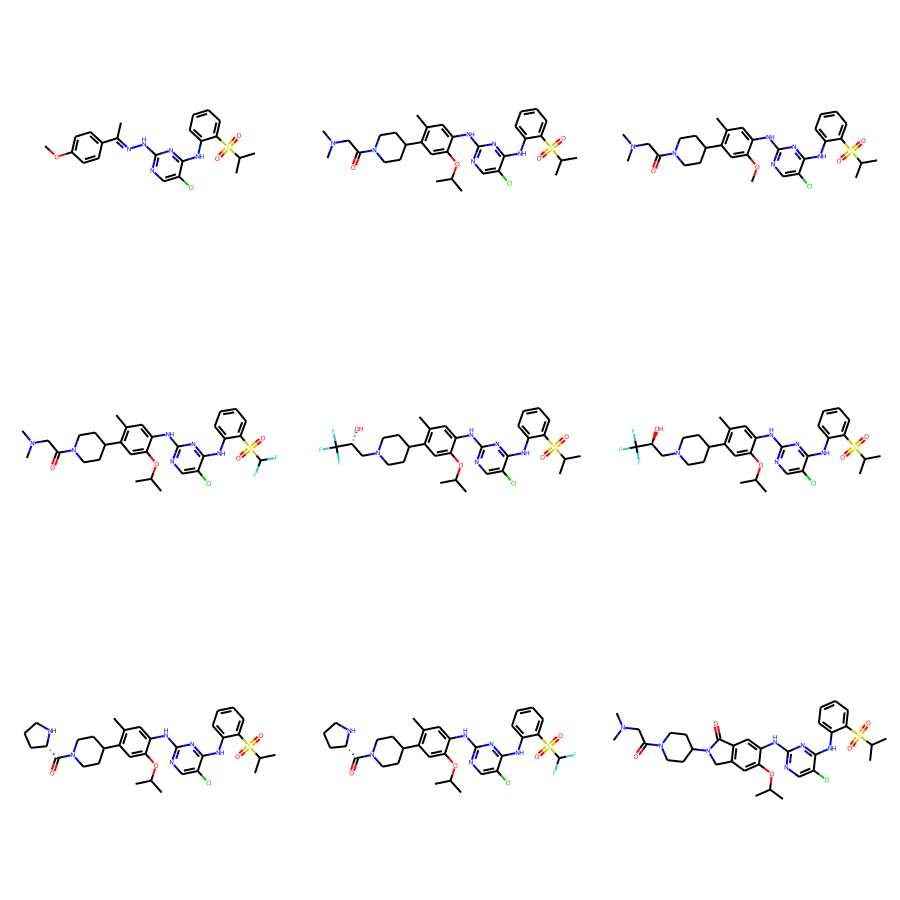

In [12]:
Draw.MolsToGridImage([i for i in mols[:9]], molsPerRow=3, subImgSize=(300,300))

In [13]:
mol_scaffolds = [Chem.MolFromSmiles(smi_scaffold) for smi_scaffold in scaffolds.keys()]

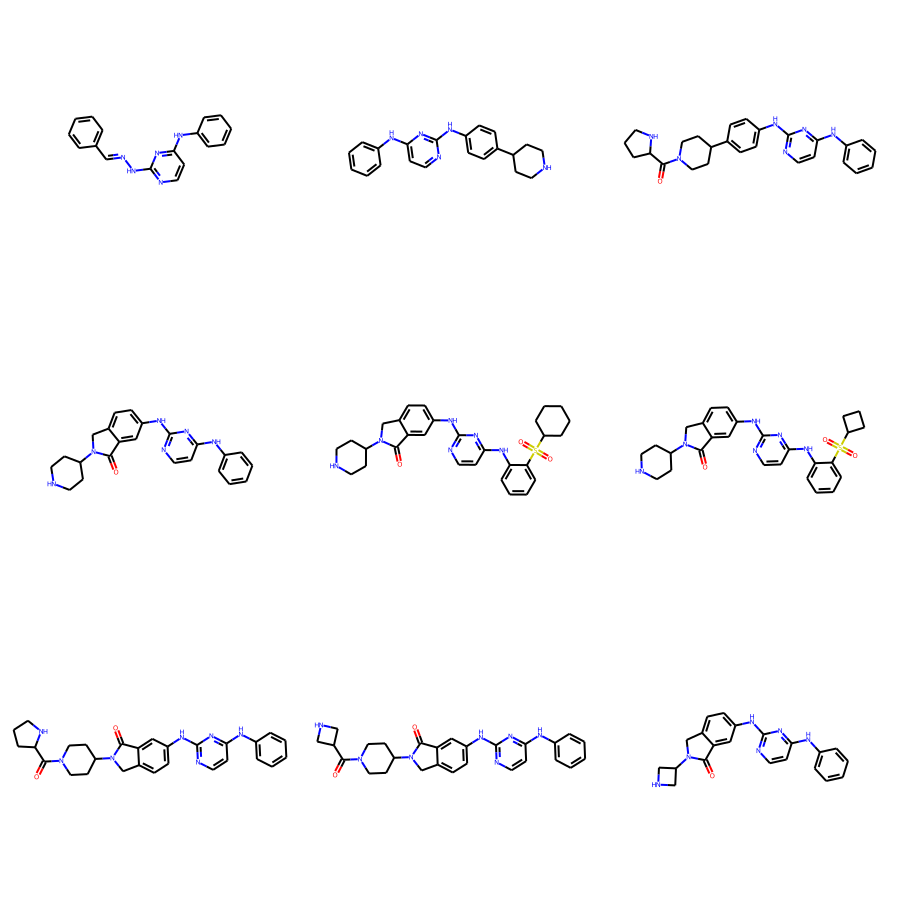

In [14]:
Draw.MolsToGridImage(mol_scaffolds[:9], molsPerRow=3, subImgSize=(300,300))

In [15]:
print("Num of dataset:", idx)
print("Num of Murcko scaffolds in dataset:",len(scaffolds.keys()))

Num of dataset: 1943
Num of Murcko scaffolds in dataset: 824


In [17]:
## 基于Murcko骨架聚类

scaffolds = {}
clusters_list =[]
 
 
idx = 1
for mol in mols:
    scaffold_smi =  MurckoScaffold.MurckoScaffoldSmiles(mol=mol, includeChirality=False)
    if scaffold_smi not in scaffolds.keys():
        scaffolds[scaffold_smi] = idx
        idx+=1
        
    cluster_id = scaffolds[scaffold_smi]
    clusters_list.append(cluster_id)


In [21]:
print("Num of Murcko scaffolds in dataset:",len(scaffolds.keys()))  ## 共聚类了多少类

Num of Murcko scaffolds in dataset: 824


In [24]:
len(clusters_list)

1943

In [18]:
## 聚类11个簇，查看其化合物
new_dict = {v : k for k, v in scaffolds.items()}

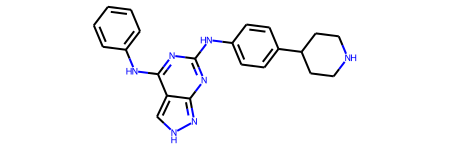

In [19]:
Chem.MolFromSmiles(new_dict[11])  ## 11的骨架

In [20]:
clusters_list = np.array(clusters_list)
print(clusters_list.shape)

(1943,)


In [25]:
idx_c15 = np.where(clusters_list==11)[0]
idx_c15

array([  19,   20,   21,   22,   23,   29,   30,   31,   32,   34,   35,
         36,   37,   38,   40,   41,   42,   43,   44,   45,   50,   52,
       1504])

In [30]:
np.where(clusters_list==11)

(array([  19,   20,   21,   22,   23,   29,   30,   31,   32,   34,   35,
          36,   37,   38,   40,   41,   42,   43,   44,   45,   50,   52,
        1504]),)

In [27]:
mol_list_c15 = [ mols[i] for i in idx_c15]

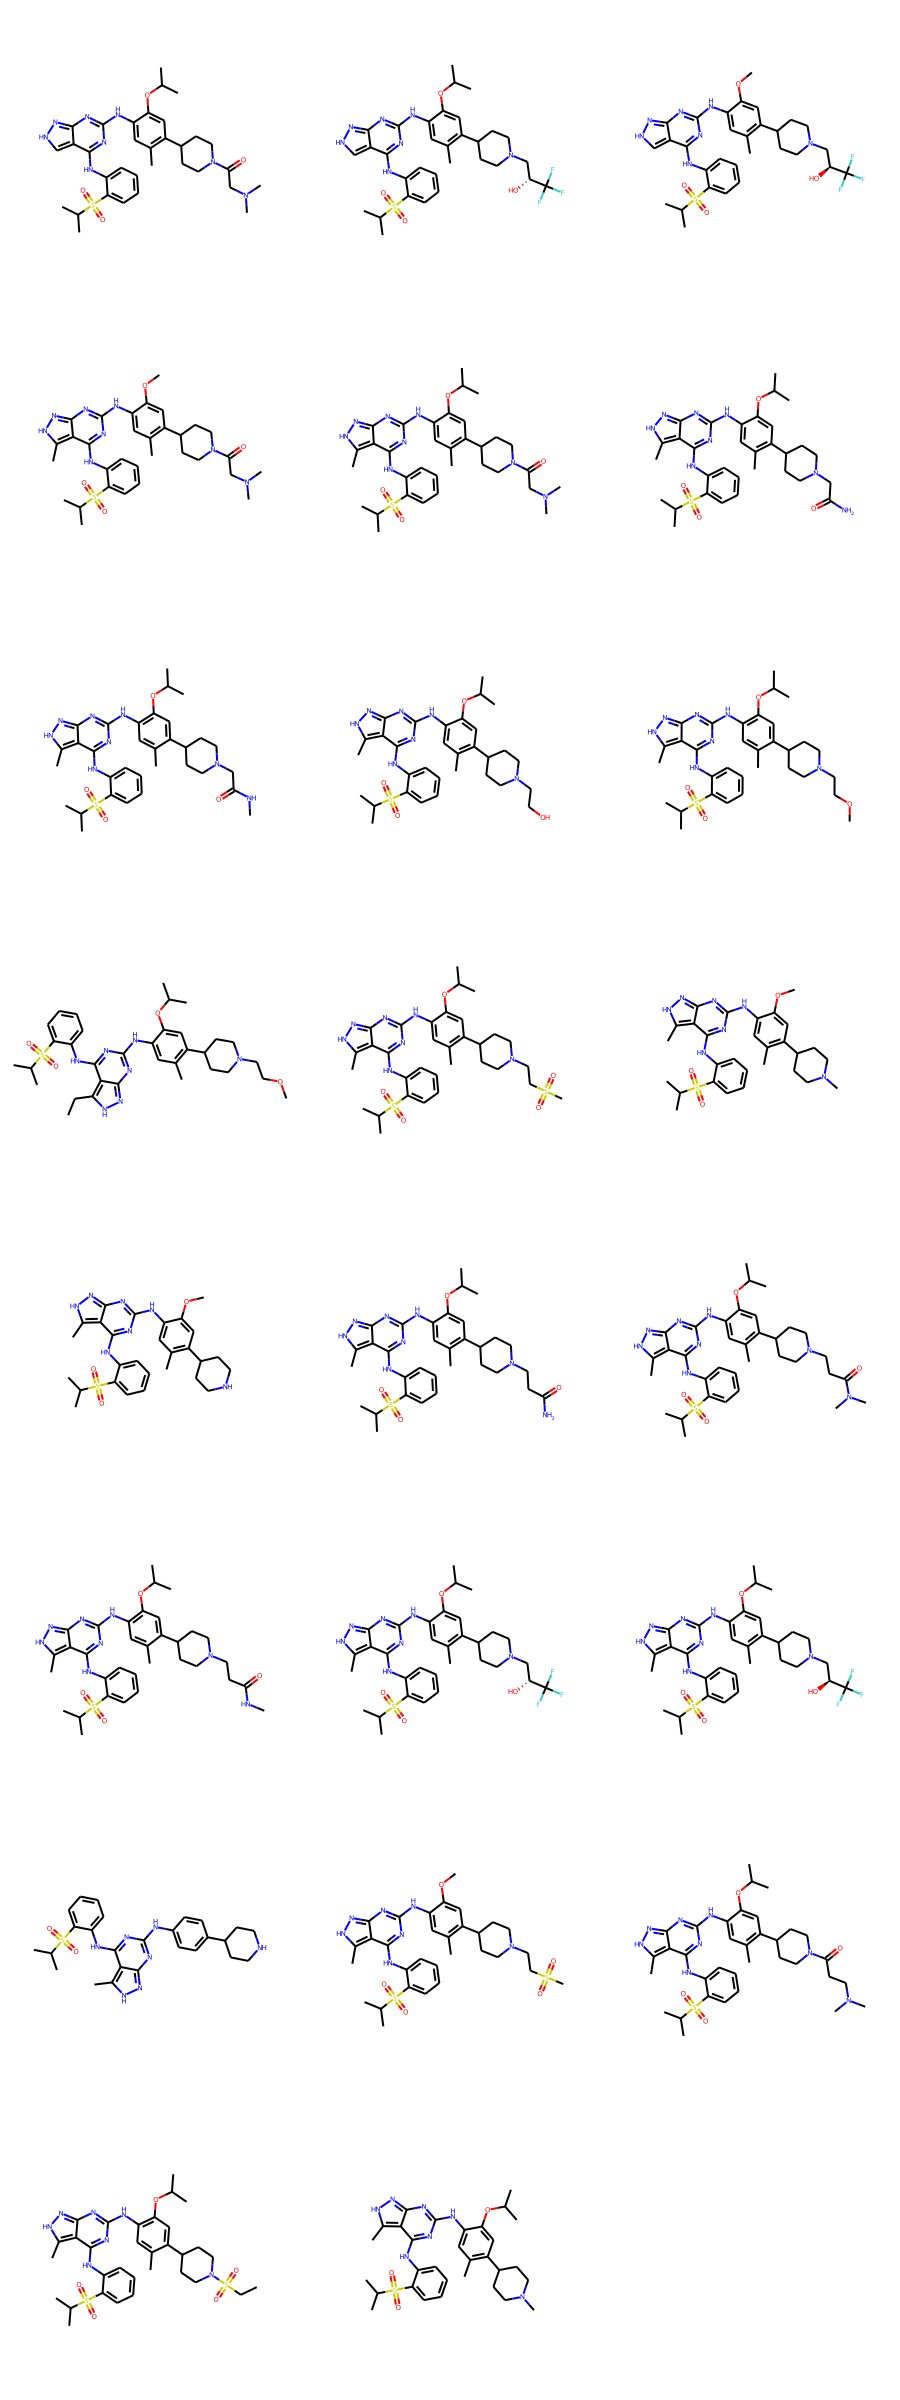

In [32]:
Draw.MolsToGridImage([i for i in mol_list_c15], molsPerRow=3, subImgSize=(300,300))

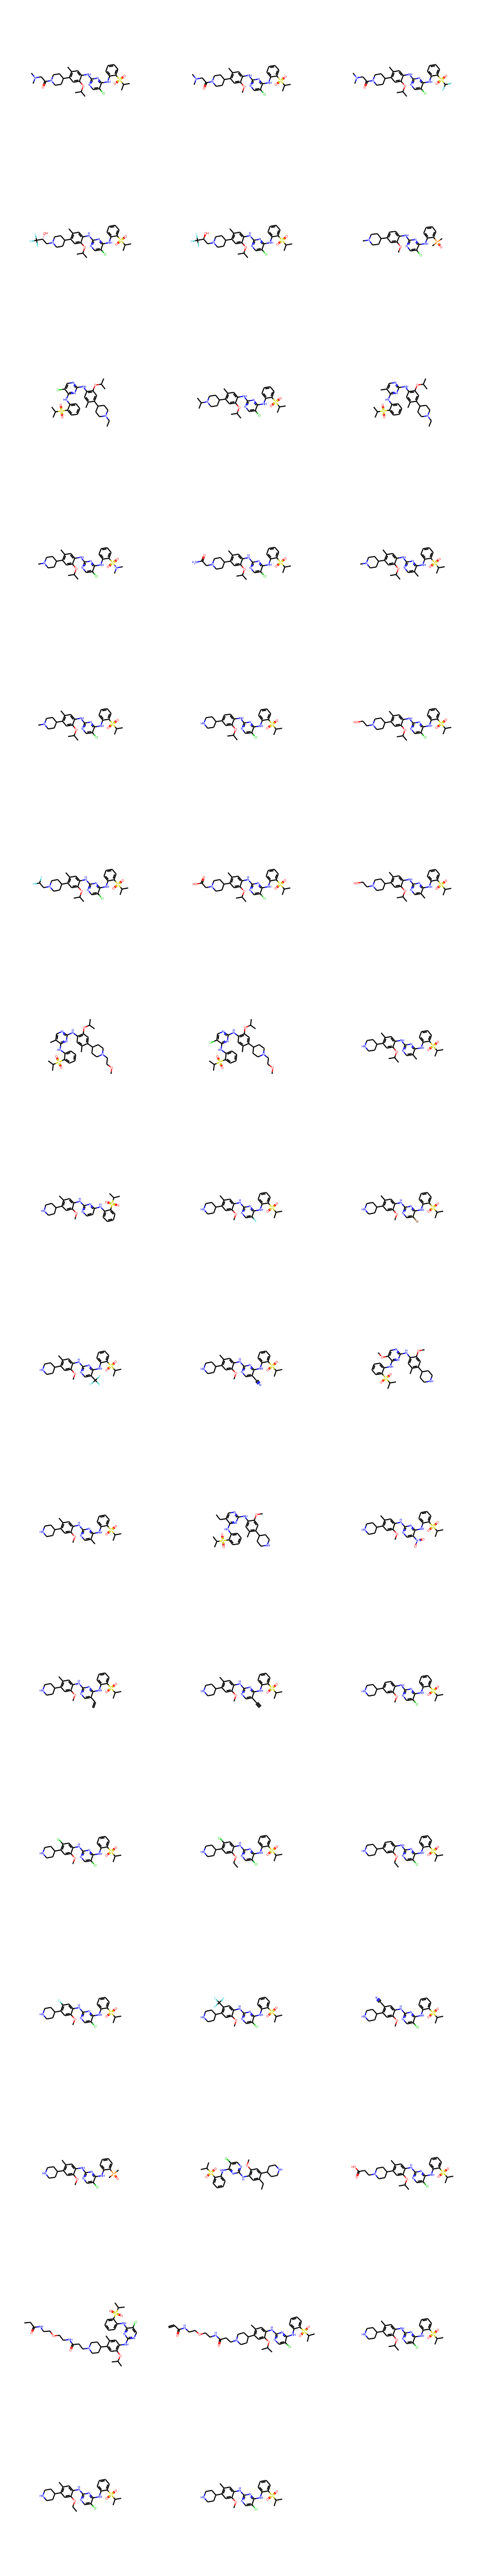

In [34]:
## 聚类2个簇，查看其化合物
new_dict = {v : k for k, v in scaffolds.items()}

Chem.MolFromSmiles(new_dict[2])  ## 2的骨架


clusters_list = np.array(clusters_list)
idx_c15 = np.where(clusters_list==2)[0]
mol_list_c15 = [ mols[i] for i in idx_c15]
# print(mol_list_c15)
Draw.MolsToGridImage([i for i in mol_list_c15], molsPerRow=3, subImgSize=(300,300))


In [35]:
new_dict.keys()


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

# Scaffold split

In [36]:
import pandas as pd

In [38]:
dataset = pd.read_csv("data/kinase/keepmean-norepeat_preprocess_ALK_TYROSINE_KINASE_RECEPTOR.tsv", sep="\t")

In [39]:
scaffolds = {}
data_len = len(dataset)
print(data_len)

1943


In [41]:
def _generate_scaffold(smiles, include_chirality=False):
    mol = Chem.MolFromSmiles(smiles)
    scaffold = MurckoScaffold.MurckoScaffoldSmiles(mol=mol, includeChirality=include_chirality)
    return scaffold

In [42]:
log_every_n = 1000
print("About to generate scaffolds")
for ind, smiles in enumerate(dataset.compound_iso_smiles):
    if ind % log_every_n == 0:
        print("Generating scaffold %d/%d" % (ind, data_len))
    scaffold = _generate_scaffold(smiles)
    if scaffold not in scaffolds:
        scaffolds[scaffold] = [ind]
    else:
        scaffolds[scaffold].append(ind)

About to generate scaffolds
Generating scaffold 0/1943
Generating scaffold 1000/1943


In [44]:
scaffolds

{'C(=NNc1nccc(Nc2ccccc2)n1)c1ccccc1': [0,
  1015,
  1016,
  1017,
  1018,
  1019,
  1020,
  1021],
 'c1ccc(Nc2ccnc(Nc3ccc(C4CCNCC4)cc3)n2)cc1': [1,
  2,
  3,
  4,
  5,
  793,
  971,
  972,
  973,
  974,
  977,
  978,
  979,
  980,
  981,
  982,
  984,
  985,
  987,
  988,
  989,
  1261,
  1262,
  1263,
  1264,
  1265,
  1266,
  1267,
  1268,
  1269,
  1271,
  1272,
  1273,
  1276,
  1277,
  1278,
  1279,
  1280,
  1281,
  1294,
  1297,
  1432,
  1434,
  1507,
  1514,
  1600,
  1700],
 'O=C(C1CCCN1)N1CCC(c2ccc(Nc3nccc(Nc4ccccc4)n3)cc2)CC1': [6, 7],
 'O=C1c2cc(Nc3nccc(Nc4ccccc4)n3)ccc2CN1C1CCNCC1': [8],
 'O=C1c2cc(Nc3nccc(Nc4ccccc4S(=O)(=O)C4CCCCC4)n3)ccc2CN1C1CCNCC1': [9],
 'O=C1c2cc(Nc3nccc(Nc4ccccc4S(=O)(=O)C4CCC4)n3)ccc2CN1C1CCNCC1': [10],
 'O=C(C1CCCN1)N1CCC(N2Cc3ccc(Nc4nccc(Nc5ccccc5)n4)cc3C2=O)CC1': [11, 12, 13],
 'O=C(C1CNC1)N1CCC(N2Cc3ccc(Nc4nccc(Nc5ccccc5)n4)cc3C2=O)CC1': [14, 15],
 'O=C1c2cc(Nc3nccc(Nc4ccccc4)n3)ccc2CN1C1CNC1': [16],
 'O=C(C1CCCN1)N1CC(N2Cc3ccc(Nc4nccc(Nc5cccc

In [45]:
scaffolds = {key: sorted(value) for key, value in scaffolds.items()}
scaffolds

{'C(=NNc1nccc(Nc2ccccc2)n1)c1ccccc1': [0,
  1015,
  1016,
  1017,
  1018,
  1019,
  1020,
  1021],
 'c1ccc(Nc2ccnc(Nc3ccc(C4CCNCC4)cc3)n2)cc1': [1,
  2,
  3,
  4,
  5,
  793,
  971,
  972,
  973,
  974,
  977,
  978,
  979,
  980,
  981,
  982,
  984,
  985,
  987,
  988,
  989,
  1261,
  1262,
  1263,
  1264,
  1265,
  1266,
  1267,
  1268,
  1269,
  1271,
  1272,
  1273,
  1276,
  1277,
  1278,
  1279,
  1280,
  1281,
  1294,
  1297,
  1432,
  1434,
  1507,
  1514,
  1600,
  1700],
 'O=C(C1CCCN1)N1CCC(c2ccc(Nc3nccc(Nc4ccccc4)n3)cc2)CC1': [6, 7],
 'O=C1c2cc(Nc3nccc(Nc4ccccc4)n3)ccc2CN1C1CCNCC1': [8],
 'O=C1c2cc(Nc3nccc(Nc4ccccc4S(=O)(=O)C4CCCCC4)n3)ccc2CN1C1CCNCC1': [9],
 'O=C1c2cc(Nc3nccc(Nc4ccccc4S(=O)(=O)C4CCC4)n3)ccc2CN1C1CCNCC1': [10],
 'O=C(C1CCCN1)N1CCC(N2Cc3ccc(Nc4nccc(Nc5ccccc5)n4)cc3C2=O)CC1': [11, 12, 13],
 'O=C(C1CNC1)N1CCC(N2Cc3ccc(Nc4nccc(Nc5ccccc5)n4)cc3C2=O)CC1': [14, 15],
 'O=C1c2cc(Nc3nccc(Nc4ccccc4)n3)ccc2CN1C1CNC1': [16],
 'O=C(C1CCCN1)N1CC(N2Cc3ccc(Nc4nccc(Nc5cccc

In [47]:
scaffold_sets = [
     scaffold_set for (scaffold, scaffold_set) in sorted(
         scaffolds.items(), key=lambda x: (len(x[1]), x[1][0]), reverse=True)
 ]
scaffold_sets

[[691,
  694,
  696,
  697,
  698,
  699,
  701,
  703,
  704,
  812,
  813,
  814,
  815,
  816,
  817,
  818,
  1028,
  1038,
  1041,
  1042,
  1043,
  1044,
  1047,
  1048,
  1049,
  1050,
  1053,
  1057,
  1058,
  1060,
  1061,
  1062,
  1063,
  1064,
  1065,
  1066,
  1067,
  1068,
  1069,
  1070,
  1071,
  1072,
  1073,
  1074,
  1075,
  1076,
  1077,
  1078,
  1081,
  1085,
  1087,
  1088,
  1089,
  1090,
  1091,
  1092,
  1093,
  1094,
  1095,
  1096,
  1097,
  1098,
  1099,
  1100,
  1101,
  1315,
  1348,
  1349,
  1350,
  1351,
  1352,
  1353,
  1354,
  1355,
  1357,
  1358,
  1359,
  1524,
  1525,
  1668,
  1701,
  1702,
  1703,
  1843],
 [345,
  346,
  347,
  348,
  349,
  350,
  351,
  352,
  353,
  354,
  355,
  356,
  357,
  358,
  359,
  360,
  362,
  363,
  364,
  365,
  366,
  367,
  368,
  369,
  370,
  371,
  372,
  373,
  374,
  375,
  376,
  377,
  378,
  379,
  380,
  381,
  382,
  383,
  384,
  385,
  386,
  387,
  388,
  389,
  390,
  391,
  392,
  393,
  394,


In [48]:
len(scaffolds.keys())

824

In [49]:
len(scaffold_sets)

824

In [50]:
1/6

0.16666666666666666

In [51]:
from typing import List

In [52]:
valid_size, test_size = 1/6, 1/6